# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    z = z - 0.5
    x = (z**2).sum()**0.5
    n = np.random.randn(*x.shape)*sigma    
    return np.array([x + n])

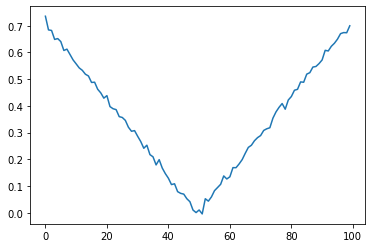

In [4]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0) for z0 in z]
plt.plot(x)

In [5]:
z0 = np.ones(2)*0.7
x0 = model(z0, sigma = 1e-6)
x0

array([0.28284091])

In [6]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE)

In [7]:
sw.run(nrounds = 1, max_epochs = 10, recycle_net = False, threshold = 1e-4, nsamples = 10000)

Normalizations
x_mean tensor([0.3842])
x_err tensor([0.1418])
z_mean tensor([0.4993, 0.4998])
z_err tensor([0.2897, 0.2893])
Epoch: 0 []
Epoch: 1 [4.497050892561674]
Epoch: 2 [4.497050892561674, 4.461294513195753]
Epoch: 3 [4.497050892561674, 4.461294513195753, 4.4629026018083096]
Epoch: 4 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879]
Epoch: 5 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879, 4.478688579052687]
Epoch: 6 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879, 4.478688579052687, 4.417536154389381]
Epoch: 7 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879, 4.478688579052687, 4.417536154389381, 4.477730855345726]
Epoch: 8 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879, 4.478688579052687, 4.417536154389381, 4.477730855345726, 4.338177412748337]
Epoch: 9 [4.497050892561674, 4.461294513195753, 4.4629026018083096, 4.379024565219879, 4.4786

/home/bmiller/swyft/swyft/core.py:227: UserWarning: Training finished by reaching max_epochs == 10.
  warn(f"Training finished by reaching max_epochs == {max_epochs}.")


(0.0, 1.0)

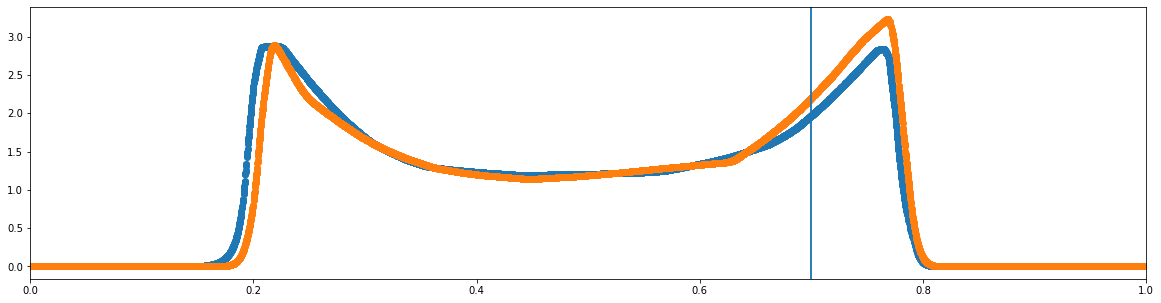

In [8]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p  = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.scatter(z, p)
plt.xlim([0, 1])

In [9]:
sw.comb([[0, 1]], max_epochs = 1)

Normalizations
x_mean tensor([0.3842])
x_err tensor([0.1418])
z_mean tensor([0.4993, 0.4998])
z_err tensor([0.2897, 0.2893])
Epoch: 0 []


/home/bmiller/swyft/swyft/core.py:227: UserWarning: Training finished by reaching max_epochs == 1.
  warn(f"Training finished by reaching max_epochs == {max_epochs}.")


(0.0, 1.0)

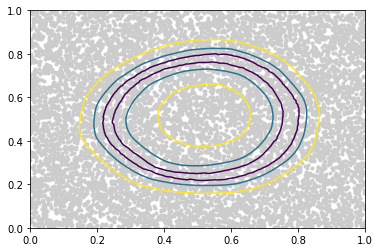

In [10]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])